In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [65]:
#read in merged cognitive and temperament data metrics
#data_arms1 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_fluid_ARMS1_merged.csv")
#data_arms2 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_fluid_ARMS2_merged.csv")
data_arms1 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_list_ARMS1_merged.csv")
data_arms2 = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/code/jacob/Temp_fixed_list_ARMS2_merged.csv")
#xgb_data_arms1 = pd.read_csv("/home/faird/lundq163/projects/FRF_results_viz/GBM_work/fluid_arms1_cog_data_with_arms2_xgb_model.csv")
#xgb_data_arms2 = pd.read_csv("/home/faird/lundq163/projects/FRF_results_viz/GBM_work/fluid_arms2_cog_data_with_arms1_xgb_model.csv")

In [66]:
xgb_data_arms1

NameError: name 'xgb_data_arms1' is not defined

In [67]:
data_arms1 = data_arms1.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)
data_arms2 = data_arms2.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)
#xgb_data_arms1 = xgb_data_arms1.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)
#xgb_data_arms2 = xgb_data_arms2.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)

In [68]:
xgb_data_arms2

NameError: name 'xgb_data_arms2' is not defined

In [69]:
#filter dataframes to include only communities with more than 100 participants
communities_more_than_100_arms1 = data_arms1['community'].value_counts()[data_arms1['community'].value_counts() > 100].index
filtered_data_arms1 = data_arms1[data_arms1['community'].isin(communities_more_than_100_arms1)]
communities_more_than_100_arms2 = data_arms2['community'].value_counts()[data_arms2['community'].value_counts() > 100].index
filtered_data_arms2 = data_arms2[data_arms2['community'].isin(communities_more_than_100_arms2)]

In [70]:
#convert community to a categorical variable to ensure proper ordering on the x-axis
filtered_data_arms1.loc[:, 'community'] = pd.Categorical(filtered_data_arms1['community'])
filtered_data_arms2.loc[:, 'community'] = pd.Categorical(filtered_data_arms2['community'])
#xgb_data_arms1.loc[:, 'community'] = pd.Categorical(xgb_data_arms1['community'])
#xgb_data_arms2.loc[:, 'community'] = pd.Categorical(xgb_data_arms2['community'])

In [71]:
communities_more_than_100_arms2

Index([1, 2, 4, 3, 6, 5, 7], dtype='int64', name='community')

In [72]:
filtered_data_arms2.dtypes

src_subject_id.baseline_year_1_arm_1.x                   object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
sex.baseline_year_1_arm_1.x                              object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1      float64
nihtbx_flanker_agecorrected.baseline_yea

In [73]:
xgb_data_arms2.dtypes

NameError: name 'xgb_data_arms2' is not defined

In [74]:
def se(x):
    return np.std(x, ddof=1) / np.sqrt(len(x))

In [75]:
print(filtered_data_arms1.dtypes)

src_subject_id.baseline_year_1_arm_1.x                   object
X                                                         int64
dataset_id.baseline_year_1_arm_1.x                        int64
interview_age.baseline_year_1_arm_1.x                     int64
sex.baseline_year_1_arm_1.x                              object
bis_y_ss_bas_rr.baseline_year_1_arm_1                     int64
bis_y_ss_bas_drive.baseline_year_1_arm_1                  int64
bis_y_ss_bas_fs.baseline_year_1_arm_1                     int64
bis_y_ss_bis_sum.baseline_year_1_arm_1                    int64
upps_y_ss_negative_urgency.baseline_year_1_arm_1          int64
upps_y_ss_positive_urgency.baseline_year_1_arm_1          int64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1          int64
upps_y_ss_sensation_seeking.baseline_year_1_arm_1         int64
upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1      int64
nihtbx_picvocab_agecorrected.baseline_year_1_arm_1        int64
nihtbx_flanker_agecorrected.baseline_yea

In [76]:
#calculate mean and standard error by community for ARMS1 and ARMS2
mean_and_se_by_community_arms1 = filtered_data_arms1.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in filtered_data_arms1.filter(regex='^(bis|upps|nihtbx).*').columns})
mean_and_se_by_community_arms2 = filtered_data_arms2.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in filtered_data_arms2.filter(regex='^(bis|upps|nihtbx).*').columns})

#mean_and_se_xgb_arms2comm_arms1data = xgb_data_arms1.groupby('community', observed=False).agg(
#    {col: ['mean', se] for col in xgb_data_arms1.filter(regex='^(bis|upps|nihtbx).*').columns})
#mean_and_se_xgb_arms1comm_arms2data = xgb_data_arms2.groupby('community', observed=False).agg(
#    {col: ['mean', se] for col in xgb_data_arms2.filter(regex='^(bis|upps|nihtbx).*').columns})

In [77]:
mean_and_se_by_community_arms2.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1                 mean    float64
                                                      se      float64
bis_y_ss_bas_drive.baseline_year_1_arm_1              mean    float64
                                                      se      float64
bis_y_ss_bas_fs.baseline_year_1_arm_1                 mean    float64
                                                      se      float64
bis_y_ss_bis_sum.baseline_year_1_arm_1                mean    float64
                                                      se      float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1      mean    float64
                                                      se      float64
upps_y_ss_sensation_

In [78]:
mean_and_se_xgb_arms1comm_arms2data.dtypes

NameError: name 'mean_and_se_xgb_arms1comm_arms2data' is not defined

In [79]:
#consolidate columns 
mean_and_se_by_community_arms1.columns = ['_'.join(col).strip() for col in mean_and_se_by_community_arms1.columns.values]
mean_and_se_by_community_arms2.columns = ['_'.join(col).strip() for col in mean_and_se_by_community_arms2.columns.values]
#mean_and_se_xgb_arms2comm_arms1data.columns = ['_'.join(col).strip() for col in mean_and_se_xgb_arms2comm_arms1data.columns.values]
#mean_and_se_xgb_arms1comm_arms2data.columns = ['_'.join(col).strip() for col in mean_and_se_xgb_arms1comm_arms2data.columns.values]

In [80]:
mean_and_se_xgb_arms1comm_arms2data.dtypes

NameError: name 'mean_and_se_xgb_arms1comm_arms2data' is not defined

In [81]:
mean_and_se_by_community_arms1.dtypes

bis_y_ss_bas_rr.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_rr.baseline_year_1_arm_1_se                     float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_mean                float64
bis_y_ss_bas_drive.baseline_year_1_arm_1_se                  float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_mean                   float64
bis_y_ss_bas_fs.baseline_year_1_arm_1_se                     float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_mean                  float64
bis_y_ss_bis_sum.baseline_year_1_arm_1_se                    float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_negative_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_mean        float64
upps_y_ss_positive_urgency.baseline_year_1_arm_1_se          float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1_mean        float64
upps_y_ss_lack_of_planning.baseline_year_1_arm_1_se          float64
upps_y_ss_sensation_seeking.baseli

# capturing all data averages

In [82]:
#calculate mean and standard error for all ABCD participants (nihtbx and upps/bisbas)
#first, save all cognitive and temperament data as dfs and merge it into one 
arms1_test_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS1_test_FRF_UPPS_short_for_FRF_fixed.csv")
arms1_train_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS1_train_FRF_UPPS_short_for_FRF_fixed.csv")
arms2_test_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS2_test_FRF_UPPS_short_for_FRF_fixed.csv")
arms2_train_full_data = pd.read_csv("/home/feczk001/shared/projects/FEZ_USERS/feczk001/UPPS_ABCD_FRF/data/ARMS2_train_FRF_UPPS_short_for_FRF_fixed.csv")

combined_full_data = pd.concat([arms1_test_full_data, arms1_train_full_data, arms2_test_full_data, arms2_train_full_data])

In [83]:
combined_full_data

,Unnamed: 0,dataset_id.baseline_year_1_arm_1.x,src_subject_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_list_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1
0,1,47437,NDAR_INV003RTV85,131,F,9.0,2.0,6.0,2.0,10.0,...,122.0,101.0,100.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0
1,3,47437,NDAR_INV007W6H7B,126,M,5.0,1.0,1.0,6.0,6.0,...,122.0,92.0,107.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0
2,4,47437,NDAR_INV00BD7VDC,112,M,6.0,2.0,5.0,11.0,8.0,...,98.0,116.0,145.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0
3,6,47437,NDAR_INV00HEV6HB,124,M,13.0,4.0,7.0,4.0,12.0,...,92.0,74.0,93.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0
4,8,47437,NDAR_INV00LH735Y,109,M,12.0,3.0,6.0,2.0,5.0,...,98.0,88.0,82.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,11858,47437,NDAR_INVZYTK0K1Y,110,F,15.0,9.0,7.0,17.0,13.0,...,131.0,107.0,131.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0
2545,11859,47437,NDAR_INVZZ0348LF,131,F,12.0,6.0,7.0,10.0,7.0,...,102.0,92.0,100.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0
2546,11861,47437,NDAR_INVZZ1MNPK5,124,F,12.0,3.0,5.0,15.0,11.0,...,183.0,119.0,107.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0
2547,11870,47437,NDAR_INVZZLZCKAY,110,F,10.0,3.0,5.0,17.0,9.0,...,98.0,88.0,103.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0


In [84]:
#combined_full_data = combined_full_data.drop('nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1', axis=1)
combined_full_data = combined_full_data.drop('nihtbx_list_agecorrected.baseline_year_1_arm_1', axis=1)

In [85]:
combined_full_data

,Unnamed: 0,dataset_id.baseline_year_1_arm_1.x,src_subject_id.baseline_year_1_arm_1.x,interview_age.baseline_year_1_arm_1.x,sex.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,...,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1
0,1,47437,NDAR_INV003RTV85,131,F,9.0,2.0,6.0,2.0,10.0,...,10.0,122.0,101.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0
1,3,47437,NDAR_INV007W6H7B,126,M,5.0,1.0,1.0,6.0,6.0,...,10.0,122.0,92.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0
2,4,47437,NDAR_INV00BD7VDC,112,M,6.0,2.0,5.0,11.0,8.0,...,6.0,98.0,116.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0
3,6,47437,NDAR_INV00HEV6HB,124,M,13.0,4.0,7.0,4.0,12.0,...,7.0,92.0,74.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0
4,8,47437,NDAR_INV00LH735Y,109,M,12.0,3.0,6.0,2.0,5.0,...,5.0,98.0,88.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,11858,47437,NDAR_INVZYTK0K1Y,110,F,15.0,9.0,7.0,17.0,13.0,...,10.0,131.0,107.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0
2545,11859,47437,NDAR_INVZZ0348LF,131,F,12.0,6.0,7.0,10.0,7.0,...,5.0,102.0,92.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0
2546,11861,47437,NDAR_INVZZ1MNPK5,124,F,12.0,3.0,5.0,15.0,11.0,...,5.0,183.0,119.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0
2547,11870,47437,NDAR_INVZZLZCKAY,110,F,10.0,3.0,5.0,17.0,9.0,...,5.0,98.0,88.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0


In [86]:
#combine relevant columns for analysis
combined_full_data_rel_cols = combined_full_data.filter(regex='^(src|bis|upps|nihtbx).*')
combined_full_data_rel_cols.loc[:, 'community'] = 'all'
combined_full_data_rel_cols

/tmp/ipykernel_4127629/1763277919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_full_data_rel_cols.loc[:, 'community'] = 'all'


,src_subject_id.baseline_year_1_arm_1.x,bis_y_ss_bas_rr.baseline_year_1_arm_1,bis_y_ss_bas_drive.baseline_year_1_arm_1,bis_y_ss_bas_fs.baseline_year_1_arm_1,bis_y_ss_bis_sum.baseline_year_1_arm_1,upps_y_ss_negative_urgency.baseline_year_1_arm_1,upps_y_ss_positive_urgency.baseline_year_1_arm_1,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,upps_y_ss_sensation_seeking.baseline_year_1_arm_1,upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1,nihtbx_picvocab_agecorrected.baseline_year_1_arm_1,nihtbx_flanker_agecorrected.baseline_year_1_arm_1,nihtbx_cardsort_agecorrected.baseline_year_1_arm_1,nihtbx_pattern_agecorrected.baseline_year_1_arm_1,nihtbx_picture_agecorrected.baseline_year_1_arm_1,nihtbx_reading_agecorrected.baseline_year_1_arm_1,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1,community
0,NDAR_INV003RTV85,9.0,2.0,6.0,2.0,10.0,7.0,11.0,7.0,10.0,122.0,101.0,86.0,103.0,106.0,81.0,98.0,102.0,99.0,all
1,NDAR_INV007W6H7B,5.0,1.0,1.0,6.0,6.0,8.0,11.0,6.0,10.0,122.0,92.0,103.0,95.0,119.0,110.0,104.0,119.0,114.0,all
2,NDAR_INV00BD7VDC,6.0,2.0,5.0,11.0,8.0,8.0,7.0,11.0,6.0,98.0,116.0,90.0,117.0,116.0,85.0,127.0,90.0,110.0,all
3,NDAR_INV00HEV6HB,13.0,4.0,7.0,4.0,12.0,11.0,12.0,6.0,7.0,92.0,74.0,94.0,103.0,99.0,110.0,88.0,101.0,93.0,all
4,NDAR_INV00LH735Y,12.0,3.0,6.0,2.0,5.0,4.0,6.0,11.0,5.0,98.0,88.0,81.0,56.0,116.0,85.0,75.0,90.0,79.0,all
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544,NDAR_INVZYTK0K1Y,15.0,9.0,7.0,17.0,13.0,12.0,6.0,8.0,10.0,131.0,107.0,81.0,108.0,109.0,129.0,111.0,135.0,128.0,all
2545,NDAR_INVZZ0348LF,12.0,6.0,7.0,10.0,7.0,4.0,6.0,10.0,5.0,102.0,92.0,94.0,119.0,79.0,100.0,94.0,101.0,97.0,all
2546,NDAR_INVZZ1MNPK5,12.0,3.0,5.0,15.0,11.0,8.0,11.0,12.0,5.0,183.0,119.0,129.0,152.0,99.0,150.0,134.0,178.0,167.0,all
2547,NDAR_INVZZLZCKAY,10.0,3.0,5.0,17.0,9.0,10.0,9.0,6.0,5.0,98.0,88.0,90.0,91.0,88.0,107.0,87.0,103.0,94.0,all


In [87]:
#group and aggregate by community for all data
mean_and_se_all_data_nih = combined_full_data_rel_cols.groupby('community', observed=False).agg(
    {col: ['mean', se] for col in combined_full_data_rel_cols.filter(regex='^(bis|upps|nihtbx).*').columns}
)

In [88]:
mean_and_se_all_data_nih

bis_y_ss_bas_rr.baseline_year_1_arm_1            \
                                           mean        se   
community                                                   
all                                   10.996104  0.027135   

          bis_y_ss_bas_drive.baseline_year_1_arm_1            \
                                              mean        se   
community                                                      
all                                       4.131959  0.028465   

          bis_y_ss_bas_fs.baseline_year_1_arm_1            \
                                           mean        se   
community                                                   
all                                     5.69703  0.024577   

          bis_y_ss_bis_sum.baseline_year_1_arm_1            \
                                            mean        se   
community                                                    
all                                     9.514892  0.034862   

          upps_y_ss_negative_urgency.baseline_year_1_arm_1            ...  \
                                                      mean        se  ...   
community                                                             ...   
all                                               8.485843  0.024573  ...   

          nihtbx_picture_agecorrected.baseline_year_1_arm_1            \
                                                       mean        se   
community                                                               
all                                              100.990748  0.150222   

          nihtbx_reading_agecorrected.baseline_year_1_arm_1            \
                                                       mean        se   
community                                                               
all                                              102.497345  0.177264   

          nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1            \
                                                         mean        se   
community                                                                 
all                                                95.568633   0.161352   

          nihtbx_cryst_agecorrected.baseline_year_1_arm_1           \
                                                     mean       se   
community                                                            
all                                              105.4887  0.16972   

          nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1            
                                                         mean        se  
community                                                                
all                                               100.375427   0.166685  

[1 rows x 36 columns]

In [89]:
#consolidate columns
mean_and_se_all_data_nih.columns = ['_'.join(col).strip() for col in mean_and_se_all_data_nih.columns.values]

In [90]:
mean_and_se_all_data_nih

,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,upps_y_ss_negative_urgency.baseline_year_1_arm_1_se,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
community,,,,,,,,,,,,,,,,,,,,,
all,10.996104,0.027135,4.131959,0.028465,5.69703,0.024577,9.514892,0.034862,8.485843,0.024573,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.4887,0.16972,100.375427,0.166685


# combining all data averages with other communities

In [91]:
#merge arms1/arms2 community data with all data metrics
mean_and_se_by_community_arms1_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_by_community_arms1])
mean_and_se_by_community_arms2_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_by_community_arms2])
#mean_and_se_xgb_arms2comm_arms1data_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_xgb_arms2comm_arms1data])
#mean_and_se_xgb_arms1comm_arms2data_combined = pd.concat([mean_and_se_all_data_nih, mean_and_se_xgb_arms1comm_arms2data])

In [92]:
mean_and_se_by_community_arms2_combined

,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,upps_y_ss_negative_urgency.baseline_year_1_arm_1_se,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
community,,,,,,,,,,,,,,,,,,,,,
all,10.996104,0.027135,4.131959,0.028465,5.697030,0.024577,9.514892,0.034862,8.485843,0.024573,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.488700,0.169720,100.375427,0.166685
1,10.260391,0.091910,2.850856,0.048032,5.212714,0.080854,8.850856,0.109162,8.198044,0.078649,...,103.303423,0.536948,107.732641,0.713359,99.976750,0.559360,112.486000,0.662457,107.208000,0.588587
2,10.983271,0.110331,2.946097,0.062359,6.053903,0.099660,9.981413,0.143748,9.986989,0.097899,...,101.412639,0.722815,100.600372,0.741724,94.253308,0.757053,103.397732,0.715974,98.364083,0.743507
3,9.811688,0.150008,2.235931,0.076526,3.945887,0.097908,8.924242,0.179709,7.082251,0.113855,...,101.822511,0.767307,101.571429,0.846689,96.415755,0.778575,104.557987,0.818142,100.282276,0.799550
4,12.708494,0.094765,7.781853,0.078263,6.681467,0.108358,10.092664,0.173650,8.113900,0.109997,...,100.421815,0.718064,101.400000,0.776470,96.572584,0.762482,103.766075,0.742977,99.923471,0.746039
5,12.775568,0.121944,8.153409,0.102644,7.914773,0.134811,11.147727,0.221620,10.514205,0.147717,...,98.242045,0.862531,97.796591,0.884986,91.466667,0.904516,99.938040,0.851053,94.543103,0.847479
6,10.547684,0.151498,2.455041,0.085547,5.098093,0.120626,9.084469,0.185185,7.427793,0.128554,...,104.419619,0.868960,105.147139,1.016562,99.743094,0.874404,108.977961,0.958217,104.933884,0.924118
7,8.338843,0.286893,0.000000,0.000000,3.958678,0.202735,8.049587,0.295944,7.975207,0.229823,...,103.442149,1.474802,106.498347,1.747931,99.509244,1.428236,110.531092,1.597516,105.752941,1.425084


In [93]:
mean_and_se_xgb_arms2comm_arms1data_combined

NameError: name 'mean_and_se_xgb_arms2comm_arms1data_combined' is not defined

In [94]:
#reset index to make community a column
mean_and_se_by_community_arms1_combined = mean_and_se_by_community_arms1_combined.reset_index()
mean_and_se_by_community_arms2_combined = mean_and_se_by_community_arms2_combined.reset_index()
#mean_and_se_xgb_arms2comm_arms1data_combined = mean_and_se_xgb_arms2comm_arms1data_combined.reset_index()
#mean_and_se_xgb_arms1comm_arms2data_combined = mean_and_se_xgb_arms1comm_arms2data_combined.reset_index()

In [95]:
mean_and_se_by_community_arms2_combined

,community,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean,...,nihtbx_picture_agecorrected.baseline_year_1_arm_1_mean,nihtbx_picture_agecorrected.baseline_year_1_arm_1_se,nihtbx_reading_agecorrected.baseline_year_1_arm_1_mean,nihtbx_reading_agecorrected.baseline_year_1_arm_1_se,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_fluidcomp_agecorrected.baseline_year_1_arm_1_se,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_mean,nihtbx_cryst_agecorrected.baseline_year_1_arm_1_se,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_mean,nihtbx_totalcomp_agecorrected.baseline_year_1_arm_1_se
0,all,10.996104,0.027135,4.131959,0.028465,5.697030,0.024577,9.514892,0.034862,8.485843,...,100.990748,0.150222,102.497345,0.177264,95.568633,0.161352,105.488700,0.169720,100.375427,0.166685
1,1,10.260391,0.091910,2.850856,0.048032,5.212714,0.080854,8.850856,0.109162,8.198044,...,103.303423,0.536948,107.732641,0.713359,99.976750,0.559360,112.486000,0.662457,107.208000,0.588587
2,2,10.983271,0.110331,2.946097,0.062359,6.053903,0.099660,9.981413,0.143748,9.986989,...,101.412639,0.722815,100.600372,0.741724,94.253308,0.757053,103.397732,0.715974,98.364083,0.743507
3,3,9.811688,0.150008,2.235931,0.076526,3.945887,0.097908,8.924242,0.179709,7.082251,...,101.822511,0.767307,101.571429,0.846689,96.415755,0.778575,104.557987,0.818142,100.282276,0.799550
4,4,12.708494,0.094765,7.781853,0.078263,6.681467,0.108358,10.092664,0.173650,8.113900,...,100.421815,0.718064,101.400000,0.776470,96.572584,0.762482,103.766075,0.742977,99.923471,0.746039
5,5,12.775568,0.121944,8.153409,0.102644,7.914773,0.134811,11.147727,0.221620,10.514205,...,98.242045,0.862531,97.796591,0.884986,91.466667,0.904516,99.938040,0.851053,94.543103,0.847479
6,6,10.547684,0.151498,2.455041,0.085547,5.098093,0.120626,9.084469,0.185185,7.427793,...,104.419619,0.868960,105.147139,1.016562,99.743094,0.874404,108.977961,0.958217,104.933884,0.924118
7,7,8.338843,0.286893,0.000000,0.000000,3.958678,0.202735,8.049587,0.295944,7.975207,...,103.442149,1.474802,106.498347,1.747931,99.509244,1.428236,110.531092,1.597516,105.752941,1.425084


In [96]:
mean_and_se_xgb_arms2comm_arms1data_combined

NameError: name 'mean_and_se_xgb_arms2comm_arms1data_combined' is not defined

In [97]:
#convert data from wide to long format
value_columns = [col for col in mean_and_se_by_community_arms1_combined.columns if col != 'community']
value_columns2 = [col for col in mean_and_se_by_community_arms2_combined.columns if col != 'community']
value_columns

['bis_y_ss_bas_rr.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_rr.baseline_year_1_arm_1_se',
 'bis_y_ss_bas_drive.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_drive.baseline_year_1_arm_1_se',
 'bis_y_ss_bas_fs.baseline_year_1_arm_1_mean',
 'bis_y_ss_bas_fs.baseline_year_1_arm_1_se',
 'bis_y_ss_bis_sum.baseline_year_1_arm_1_mean',
 'bis_y_ss_bis_sum.baseline_year_1_arm_1_se',
 'upps_y_ss_negative_urgency.baseline_year_1_arm_1_mean',
 'upps_y_ss_negative_urgency.baseline_year_1_arm_1_se',
 'upps_y_ss_positive_urgency.baseline_year_1_arm_1_mean',
 'upps_y_ss_positive_urgency.baseline_year_1_arm_1_se',
 'upps_y_ss_lack_of_planning.baseline_year_1_arm_1_mean',
 'upps_y_ss_lack_of_planning.baseline_year_1_arm_1_se',
 'upps_y_ss_sensation_seeking.baseline_year_1_arm_1_mean',
 'upps_y_ss_sensation_seeking.baseline_year_1_arm_1_se',
 'upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1_mean',
 'upps_y_ss_lack_of_perseverance.baseline_year_1_arm_1_se',
 'nihtbx_picvocab_agecorrected.baseline_year

In [98]:
#convert data from wide to long format
mean_and_se_by_community_long_arms1 = pd.melt(mean_and_se_by_community_arms1_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
mean_and_se_by_community_long_arms2 = pd.melt(mean_and_se_by_community_arms2_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
#mean_and_se_xgb_arms2comm_arms1data_long = pd.melt(mean_and_se_xgb_arms2comm_arms1data_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')
#mean_and_se_xgb_arms1comm_arms2data_long = pd.melt(mean_and_se_xgb_arms1comm_arms2data_combined, id_vars=['community'], value_vars=value_columns, var_name='metric', value_name='value')

In [99]:
mean_and_se_xgb_arms2comm_arms1data_long

NameError: name 'mean_and_se_xgb_arms2comm_arms1data_long' is not defined

In [100]:
mean_and_se_by_community_long_arms2

,community,metric,value
0,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.996104
1,1,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.260391
2,2,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.983271
3,3,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,9.811688
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,12.708494
...,...,...,...
283,3,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.799550
284,4,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.746039
285,5,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.847479
286,6,nihtbx_totalcomp_agecorrected.baseline_year_1_...,0.924118


# select dataframes for figures

In [121]:
#user input to select desired communities from each arm
communities_to_plot_arms1 = input("Select communities to plot for ARMS1 (comma separated): ").split(',')
communities_to_plot_arms2 = input("Select communities to plot for ARMS2 (comma separated): ").split(',')
#xgb_arms1comm_to_plot_arms2data = input("Select communities to plot for ARMS1xgb preds w/ ARMS2 data (comma separated): ").split(',')
#xgb_arms2comm_to_plot_arms1data = input("Select communities to plot for ARMS2xgb preds w/ ARMS1 data (comma separated): ").split(',')

Select communities to plot for ARMS1 (comma separated):  1,2,3,4,5,6,7,8,9
Select communities to plot for ARMS2 (comma separated):  all


In [122]:
communities_to_plot_arms1

['1', '2', '3', '4', '5', '6', '7', '8', '9']

In [123]:
xgb_arms1comm_to_plot_arms2data

NameError: name 'xgb_arms1comm_to_plot_arms2data' is not defined

In [124]:
print(mean_and_se_by_community_long_arms1['community'].apply(type).value_counts())

community
<class 'str'>    360
Name: count, dtype: int64


In [125]:
print(mean_and_se_xgb_arms1comm_arms2data_long['community'].apply(type).value_counts())

NameError: name 'mean_and_se_xgb_arms1comm_arms2data_long' is not defined

In [126]:
#set community values to strings to match user input 
mean_and_se_by_community_long_arms1['community'] = mean_and_se_by_community_long_arms1['community'].astype(str)
mean_and_se_by_community_long_arms2['community'] = mean_and_se_by_community_long_arms2['community'].astype(str)
#mean_and_se_xgb_arms2comm_arms1data_long['community'] = mean_and_se_xgb_arms2comm_arms1data_long['community'].astype(str)
#mean_and_se_xgb_arms1comm_arms2data_long['community'] = mean_and_se_xgb_arms1comm_arms2data_long['community'].astype(str)

In [127]:
mean_and_se_by_community_long_arms2['community'].isin(communities_to_plot_arms1)

0      False
1       True
2       True
3       True
4       True
       ...  
283     True
284     True
285     True
286     True
287     True
Name: community, Length: 288, dtype: bool

In [128]:
mean_and_se_xgb_arms2comm_arms1data_long['community'].isin(xgb_arms2comm_to_plot_arms1data)

NameError: name 'mean_and_se_xgb_arms2comm_arms1data_long' is not defined

In [129]:
#filter and combine data based on selected communities
mean_and_se_by_community_selected_arms1 = mean_and_se_by_community_long_arms1[mean_and_se_by_community_long_arms1['community'].isin(communities_to_plot_arms1)]
mean_and_se_by_community_selected_arms2 = mean_and_se_by_community_long_arms2[mean_and_se_by_community_long_arms2['community'].isin(communities_to_plot_arms2)]
#mean_and_se_xgb_arms1comm_arms2data_selected = mean_and_se_xgb_arms1comm_arms2data_long[mean_and_se_xgb_arms1comm_arms2data_long['community'].isin(xgb_arms1comm_to_plot_arms2data)]
#mean_and_se_xgb_arms2comm_arms1data_selected = mean_and_se_xgb_arms2comm_arms1data_long[mean_and_se_xgb_arms2comm_arms1data_long['community'].isin(xgb_arms2comm_to_plot_arms1data)]

In [130]:
mean_and_se_by_community_selected_arms2

,community,metric,value
0,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_mean,10.996104
8,all,bis_y_ss_bas_rr.baseline_year_1_arm_1_se,0.027135
16,all,bis_y_ss_bas_drive.baseline_year_1_arm_1_mean,4.131959
24,all,bis_y_ss_bas_drive.baseline_year_1_arm_1_se,0.028465
32,all,bis_y_ss_bas_fs.baseline_year_1_arm_1_mean,5.697030
40,all,bis_y_ss_bas_fs.baseline_year_1_arm_1_se,0.024577
48,all,bis_y_ss_bis_sum.baseline_year_1_arm_1_mean,9.514892
56,all,bis_y_ss_bis_sum.baseline_year_1_arm_1_se,0.034862
64,all,upps_y_ss_negative_urgency.baseline_year_1_arm...,8.485843
72,all,upps_y_ss_negative_urgency.baseline_year_1_arm...,0.024573


In [131]:
mean_and_se_xgb_arms2comm_arms1data_selected

NameError: name 'mean_and_se_xgb_arms2comm_arms1data_selected' is not defined

# combining the dataframe for profile analysis

In [132]:
#combine data from arms1 and arms2 together for FRF preds comparisons
combined_df = pd.concat([mean_and_se_by_community_selected_arms1.assign(arm=1), mean_and_se_by_community_selected_arms2.assign(arm=2)])

#combine data from arms1xgb preds with arms1frf preds to see if the profiles replicate
#combined_df_frf1xgb = pd.concat([mean_and_se_by_community_selected_arms1.assign(arm='1_frf'), mean_and_se_xgb_arms1comm_arms2data_selected.assign(arm='1_xgb')])

#combine data from arms2xgb preds with arms2frf preds to see if the profiles replicate
#combined_df_frf2xgb = pd.concat([mean_and_se_by_community_selected_arms2.assign(arm='2_frf'), mean_and_se_xgb_arms2comm_arms1data_selected.assign(arm='2_xgb')])

#combined_df_frf2xgb

In [133]:
combined_df['value_type'] = combined_df['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
combined_df['metric'] = combined_df['metric'].apply(lambda x: x.rsplit('_', 1)[0])
#combined_df_frf1xgb['value_type'] = combined_df_frf1xgb['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
#combined_df_frf1xgb['metric'] = combined_df_frf1xgb['metric'].apply(lambda x: x.rsplit('_', 1)[0])
#combined_df_frf2xgb['value_type'] = combined_df_frf2xgb['metric'].apply(lambda x: 'mean' if x.endswith('_mean') else 'se')
#combined_df_frf2xgb['metric'] = combined_df_frf2xgb['metric'].apply(lambda x: x.rsplit('_', 1)[0])

combined_df

,community,metric,value,arm,value_type
1,1,bis_y_ss_bas_rr.baseline_year_1_arm_1,10.606973,1,mean
2,2,bis_y_ss_bas_rr.baseline_year_1_arm_1,8.800303,1,mean
3,3,bis_y_ss_bas_rr.baseline_year_1_arm_1,11.373494,1,mean
4,4,bis_y_ss_bas_rr.baseline_year_1_arm_1,12.616927,1,mean
5,5,bis_y_ss_bas_rr.baseline_year_1_arm_1,10.525994,1,mean
...,...,...,...,...,...
248,all,nihtbx_fluidcomp_agecorrected.baseline_year_1_...,0.161352,2,se
256,all,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,105.488700,2,mean
264,all,nihtbx_cryst_agecorrected.baseline_year_1_arm_1,0.169720,2,se
272,all,nihtbx_totalcomp_agecorrected.baseline_year_1_...,100.375427,2,mean


In [134]:
combined_df = combined_df.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()
#combined_df_frf1xgb = combined_df_frf1xgb.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()
#combined_df_frf2xgb = combined_df_frf2xgb.pivot_table(values='value', index=['arm', 'community', 'metric'], columns='value_type').reset_index()


combined_df.dtypes

value_type
arm            int64
community     object
metric        object
mean         float64
se           float64
dtype: object

In [135]:
# Before the plotting code, add:
combined_df['mean+se'] = combined_df['mean'] + combined_df['se']
combined_df['mean-se'] = combined_df['mean'] - combined_df['se']
#combined_df_frf1xgb['mean+se'] = combined_df_frf1xgb['mean'] + combined_df_frf1xgb['se']
#combined_df_frf1xgb['mean-se'] = combined_df_frf1xgb['mean'] - combined_df_frf1xgb['se']
#combined_df_frf2xgb['mean+se'] = combined_df_frf2xgb['mean'] + combined_df_frf2xgb['se']
#combined_df_frf2xgb['mean-se'] = combined_df_frf2xgb['mean'] - combined_df_frf2xgb['se']
combined_df

value_type,arm,community,metric,mean,se,mean+se,mean-se
0,1,1,bis_y_ss_bas_drive.baseline_year_1_arm_1,2.852615,0.059287,2.911902,2.793328
1,1,1,bis_y_ss_bas_fs.baseline_year_1_arm_1,5.935024,0.091005,6.026029,5.844018
2,1,1,bis_y_ss_bas_rr.baseline_year_1_arm_1,10.606973,0.101934,10.708907,10.505039
3,1,1,bis_y_ss_bis_sum.baseline_year_1_arm_1,9.630745,0.128018,9.758763,9.502727
4,1,1,nihtbx_cardsort_agecorrected.baseline_year_1_a...,97.857369,0.616914,98.474283,97.240455
...,...,...,...,...,...,...,...
175,2,all,upps_y_ss_lack_of_perseverance.baseline_year_1...,7.042255,0.020927,7.063181,7.021328
176,2,all,upps_y_ss_lack_of_planning.baseline_year_1_arm_1,7.737293,0.022088,7.759381,7.715205
177,2,all,upps_y_ss_negative_urgency.baseline_year_1_arm_1,8.485843,0.024573,8.510416,8.461270
178,2,all,upps_y_ss_positive_urgency.baseline_year_1_arm_1,7.990129,0.027493,8.017622,7.962636


In [136]:
def prepare_df_for_plot(df, choice):
    df_plot = df.copy()
    if choice.lower() == 'nihtbx':
        df_plot = df_plot[df_plot['metric'].str.startswith('nihtbx_')]
        df_plot['metric'] = df_plot['metric'].apply(lambda x: re.search(r'nihtbx_(.+)_agecorrected', x).group(1) if re.search(r'nihtbx_(.+)_agecorrected', x) else x)
    elif choice.lower() in ['upps', 'bis']:
        df_plot = df_plot[df_plot['metric'].str.startswith(('upps', 'bis'))]
        df_plot['metric'] = df_plot['metric'].apply(lambda x: re.search(r'ss_(.+)\.baseline', x).group(1) if re.search(r'ss_(.+)\.baseline', x) else x)
    else:
        print("Invalid choice. Please choose 'nihtbx' or 'upps/bis'.")
        return None
    return df_plot

In [137]:
choice = input("Enter nihtbx or upps or bis: ")

Enter nihtbx or upps or bis:  upps


In [138]:
df_for_plot = prepare_df_for_plot(combined_df, choice)

In [139]:
df_for_plot

value_type,arm,community,metric,mean,se,mean+se,mean-se
0,1,1,bas_drive,2.852615,0.059287,2.911902,2.793328
1,1,1,bas_fs,5.935024,0.091005,6.026029,5.844018
2,1,1,bas_rr,10.606973,0.101934,10.708907,10.505039
3,1,1,bis_sum,9.630745,0.128018,9.758763,9.502727
13,1,1,lack_of_perseverance,6.857369,0.059072,6.916441,6.798298
...,...,...,...,...,...,...,...
175,2,all,lack_of_perseverance,7.042255,0.020927,7.063181,7.021328
176,2,all,lack_of_planning,7.737293,0.022088,7.759381,7.715205
177,2,all,negative_urgency,8.485843,0.024573,8.510416,8.461270
178,2,all,positive_urgency,7.990129,0.027493,8.017622,7.962636


# creating plot. make sure its named properly

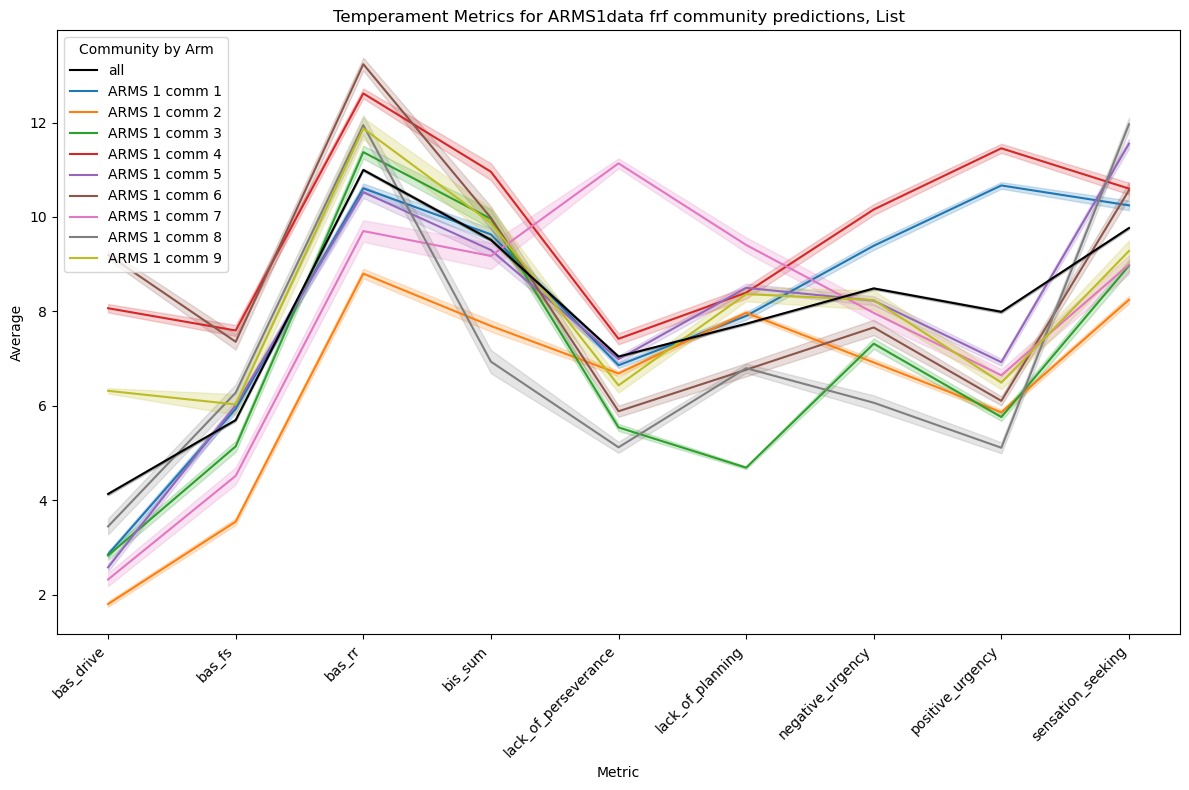

In [140]:
if df_for_plot is not None:

    colors = list(mcolors.TABLEAU_COLORS.values())
    color_values = {'all': 'black'}
    for i, (arm, community) in enumerate(df_for_plot.groupby(['arm', 'community']).groups.keys()):
        if community != 'all':
            color_values[f"ARMS {arm} comm {community}"] = colors[i % len(colors)]
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot for each community
    for (arm, community), group in df_for_plot.groupby(['arm', 'community']):
        color_key = f"ARMS {arm} comm {community}"
        if community == 'all':
            color = 'black'
            label = 'all'
        else:
            color = color_values.get(color_key, 'gray')
            label = color_key
        plt.plot('metric', 'mean', data=group, color=color, label=label)
        plt.fill_between('metric', 'mean-se', 'mean+se', data=group, color=color, alpha=0.2)
    
    # Customize the plot
    plt.xlabel('Metric')
    plt.ylabel('Average')
    plt.title('Temperament Metrics for ARMS1data frf community predictions, List')
    plt.xticks(rotation=45, ha='right')
    
    # Adjust legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    sorted_labels = sorted(by_label.keys(), key=lambda x: (x != 'all', x))
    sorted_handles = [by_label[label] for label in sorted_labels]
    sorted_labels = sorted_labels
    
    # Create the legend with the sorted handles and labels
    plt.legend(sorted_handles, sorted_labels, title="Community by Arm")
    
    plt.tight_layout()
    plt.savefig('./list_uppsbisbas_allcomms_arm1frf.png', dpi=300, bbox_inches='tight')
    plt.show()